In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_athens_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Athens')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/athens_{date}.csv',index=False)
get_listings_athens_timeseries()

HTTPError: HTTP Error 404: Not Found

In [6]:
# pull in detailed_listings
raw_df_athens = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_athens)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(athens_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 9582 AirBnb listings.


In [5]:
athens_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2020-12.csv')
athens_raw_df_12_12_2020.shape





(9413, 16)

In [7]:
# use magic commands 'cd' to change directory
# use glob to locate all files for athens
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_athens = glob.glob('athens/**.csv')
files_athens

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['athens/Athens_2020-12.csv',
 'athens/Athens_2021-08.csv',
 'athens/Athens_2021-09.csv',
 'athens/Athens_2021-02.csv',
 'athens/Athens_2021-03.csv',
 'athens/Athens_2021-01.csv',
 'athens/Athens_2021-10.csv',
 'athens/Athens_2021-04.csv',
 'athens/Athens_2021-07.csv',
 'athens/Athens_2021-06.csv']

In [10]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

athens_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(athens_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(athens_raw_df_12_12_2020['price'].mean(),2)}.")

athens_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(athens_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_1_9_2021['price'].mean(),2)}.")

athens_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(athens_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_2_8_2021['price'].mean(),2)}.")

athens_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(athens_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_3_4_2021['price'].mean(),2)}.")

athens_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(athens_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_4_9_2021['price'].mean(),2)}.")

#athens_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(athens_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_5_19_2021['price'].mean(),2)}.")

athens_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(athens_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_6_3_2021['price'].mean(),2)}.")

athens_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(athens_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_7_4_2021['price'].mean(),2)}.")

athens_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(athens_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_8_6_2021['price'].mean(),2)}.")

athens_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(athens_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_9_7_2021['price'].mean(),2)}.")

athens_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(athens_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_10_6_2021['price'].mean(),2)}.")

#athens_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/athens/athens_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(athens_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 9413 AirBnb listings; the avg price is €68.86.
The 1_9_2021 dataset contains 9482 AirBnb listings; the avg price is €74.33.
The 2_8_2021 dataset contains 9467 AirBnb listings; the avg price is €73.43.
The 3_4_2021 dataset contains 9510 AirBnb listings; the avg price is €74.94.
The 4_9_2021 dataset contains 9618 AirBnb listings; the avg price is €81.68.
The 6_3_2021 dataset contains 9584 AirBnb listings; the avg price is €86.28.
The 7_4_2021 dataset contains 9640 AirBnb listings; the avg price is €90.54.
The 8_6_2021 dataset contains 9773 AirBnb listings; the avg price is €84.23.
The 9_7_2021 dataset contains 9766 AirBnb listings; the avg price is €83.34.
The 10_6_2021 dataset contains 9582 AirBnb listings; the avg price is €83.44.


In [11]:
df_list_athens = [athens_raw_df_12_12_2020, athens_raw_df_1_9_2021, athens_raw_df_2_8_2021,
           athens_raw_df_3_4_2021, athens_raw_df_4_9_2021, athens_raw_df_6_3_2021, athens_raw_df_7_4_2021,
           athens_raw_df_8_6_2021, athens_raw_df_9_7_2021, athens_raw_df_10_6_2021]

dates_athens = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_athens = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_athens = []

def airbnb_parse_athens(df_list, files):
    for file in files_athens:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_{file}.csv")
        print(f"The {file} athens dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_athens(df_list, dates):
    for file in files_athens:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_athens.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_athens)

athens_parse = airbnb_parse_athens(df_list_athens, files_athens)


The 2020-12 athens dataset contains 9413 AirBnb listings -- the avg price is €68.86.
The 2021-01 athens dataset contains 9482 AirBnb listings -- the avg price is €74.33.
The 2021-02 athens dataset contains 9467 AirBnb listings -- the avg price is €73.43.
The 2021-03 athens dataset contains 9510 AirBnb listings -- the avg price is €74.94.
The 2021-04 athens dataset contains 9618 AirBnb listings -- the avg price is €81.68.
The 2021-06 athens dataset contains 9584 AirBnb listings -- the avg price is €86.28.
The 2021-07 athens dataset contains 9640 AirBnb listings -- the avg price is €90.54.
The 2021-08 athens dataset contains 9773 AirBnb listings -- the avg price is €84.23.
The 2021-09 athens dataset contains 9766 AirBnb listings -- the avg price is €83.34.
The 2021-10 athens dataset contains 9582 AirBnb listings -- the avg price is €83.44.


In [12]:
athens_summary = airbnb_to_frame_athens(df_list_athens, files_athens)
athens_summary['Date of scrape'] = pd.to_datetime(athens_summary['Date of scrape'])
athens_summary['City'] = 'athens'
athens_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,9413,68.86,45.0,7,8000,1.52,athens
1,2021-01-01,9482,74.33,43.0,0,8000,1.45,athens
2,2021-02-01,9467,73.43,43.0,7,8000,1.42,athens
3,2021-03-01,9510,74.94,45.0,6,8000,1.39,athens
4,2021-04-01,9618,81.68,45.0,6,8000,1.36,athens
5,2021-06-01,9584,86.28,50.0,9,8000,1.51,athens
6,2021-07-01,9640,90.54,50.0,8,8000,1.58,athens
7,2021-08-01,9773,84.23,51.0,9,8000,1.78,athens
8,2021-09-01,9766,83.34,50.0,9,8000,1.85,athens
9,2021-10-01,9582,83.44,50.0,9,8000,1.86,athens


In [13]:
master_df_athens = pd.concat(df_list_athens)
master_df_athens_unique = master_df_athens.drop_duplicates(subset='id')
master_df_athens_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,77,1,25,2020-10-06,0.21,6,0,NaN,NaN
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,38,1,44,2020-12-10,0.44,6,72,NaN,NaN
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,32,1,54,2020-12-09,0.54,6,218,NaN,NaN
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,45,1,23,2020-10-03,0.18,6,318,NaN,NaN
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,39,1,17,2020-01-08,0.17,6,91,NaN,NaN


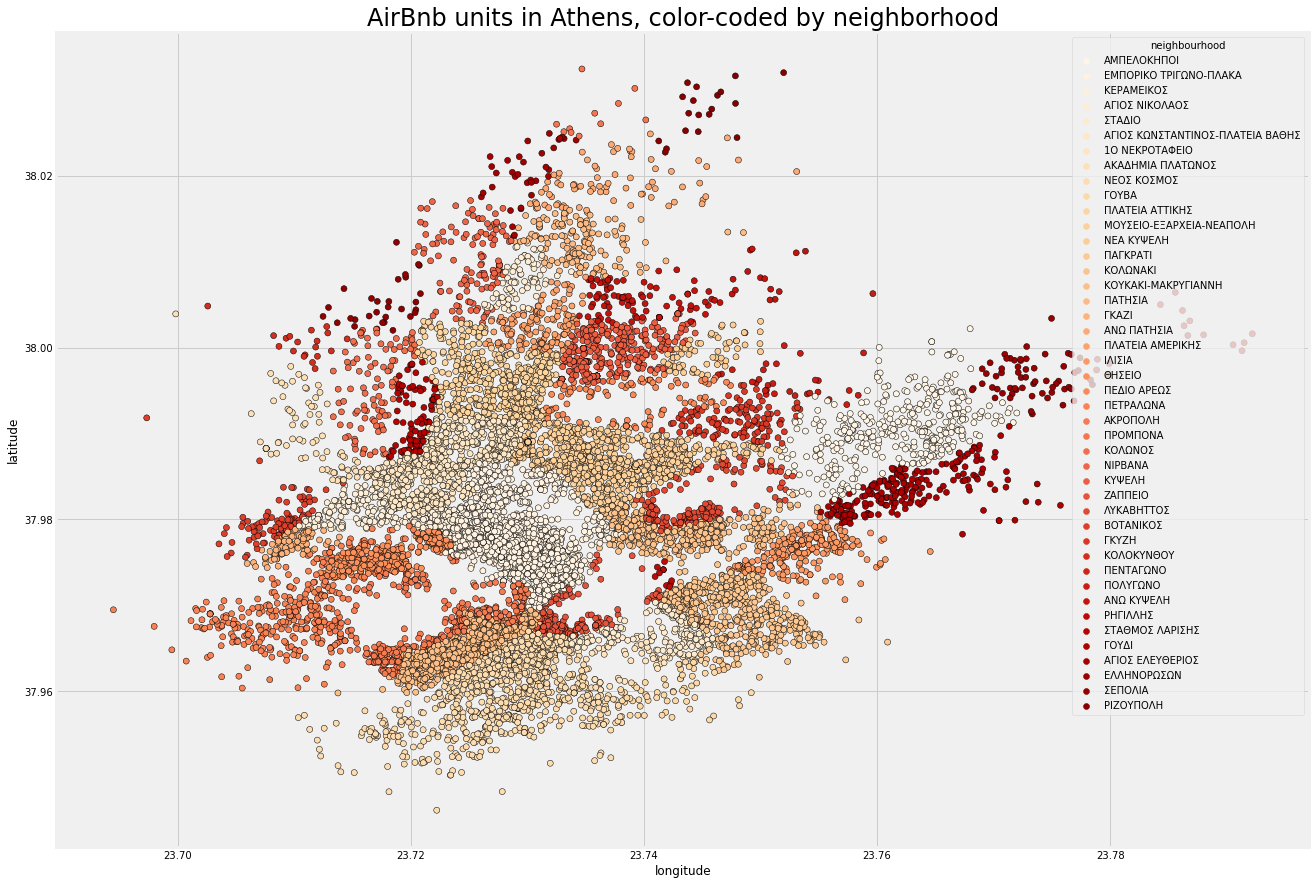

In [14]:
title = 'AirBnb units in Athens, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_athens_unique.longitude, master_df_athens_unique.latitude, hue = master_df_athens_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_athens.png')
plt.show()

## Add review data through a join

In [15]:
df_reviews = pd.concat([athens_raw_df_10_6_2021,raw_df_athens],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,79,...,4.81,4.75,4.84,4.84,4.50,4.66,t,6,0,0
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,50,...,4.94,4.90,4.90,4.92,4.82,4.82,t,6,0,0
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,38,...,4.91,4.94,4.97,4.97,4.83,4.83,t,6,0,0
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,48,...,4.95,4.91,4.91,4.87,4.77,4.77,t,6,0,0
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989240,23.765000,Entire home/apt,47,...,4.81,4.94,4.94,5.00,4.69,4.63,t,6,0,0
5,28186,❤️Deluxe central loft near Acropolis❤️,121318,Francis - Fotios,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.975450,23.728920,Entire home/apt,59,...,4.86,4.89,4.82,4.90,4.94,4.78,f,2,0,0
6,31155,sleep on sailing boat,133845,Irene,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.979620,23.715890,Private room,39,...,NaN,NaN,NaN,NaN,NaN,NaN,f,0,1,0
7,33945,Spacious Cosy aprtm very close to Metro!,146553,Katerina,NaN,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.006730,23.727750,Entire home/apt,30,...,4.71,4.69,4.86,4.89,4.59,4.80,f,2,0,0
8,49489,3bdr apt in the heart of Athens,225612,Stathis,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.976700,23.730640,Entire home/apt,120,...,4.75,4.69,4.83,4.86,4.86,4.67,t,1,0,0
9,54637,Penthouse Parthenon view in Athens,256676,Angeliki,NaN,ΠΑΓΚΡΑΤΙ,37.969190,23.743540,Entire home/apt,70,...,5.00,5.00,5.00,5.00,5.00,4.00,f,1,0,0


## Regression

In [14]:
#df_reviews_.columns

In [16]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [17]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -48.34265870886023
Coefficients:  [  8.4130304   16.89116683  -2.02003889  -0.05510484   5.83791643
  -4.03771447  23.42284673  20.63055857 -28.48959747]
LinearRegression()


In [18]:
y_pred2 = regr.predict(X_)

In [19]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
2747,392,61.414546,-330.585454
624,400,71.904966,-328.095034
6399,400,85.997544,-314.002456
215,387,75.432256,-311.567744
1114,400,112.060688,-287.939312


<function matplotlib.pyplot.ylim(*args, **kwargs)>

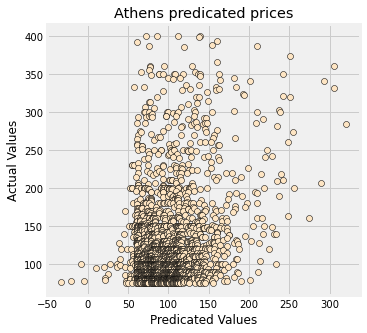

In [25]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicated Values')
plt.ylabel('Actual Values')
plt.title('Athens predicated prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim